**ImageDataGenerator for augmenting data**

```python
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)
```


In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [39]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    rotation_range=10,
)

**Splitting folder into train, val , test datasets**

In [43]:
!splitfolders --ratio 0.7 0.1 0.2 --output dataset PlantVillage

**Creating a train genenator**

In [41]:
# !mkdir augmented-images

In [51]:
IMAGE_SIZE = 256
CHANNELS = 3

train_generator = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode="sparse",  # (0 , 1 , 2)
    # save_to_dir="augmented-images",
)

Found 1506 images belonging to 3 classes.


In [47]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [48]:
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    rotation_range=10,
)

validation_generator = validation_datagen.flow_from_directory(
    "dataset/val",
    target_size=(256, 256),
    batch_size=32,
    class_mode="sparse",  # (0 , 1 , 2)
)

Found 215 images belonging to 3 classes.


In [49]:
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255, horizontal_flip=True, rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    "dataset/test",
    target_size=(256, 256),
    batch_size=32,
    class_mode="sparse",  # (0 , 1 , 2)
)

Found 431 images belonging to 3 classes.


In [52]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential(
    [
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(n_classes, activation="softmax"),
    ]
)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [55]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [56]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,  # 1500 images / 32 bach size
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,  # 200 images / 32 bach size
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 39s 575ms/step - loss: 0.9061 - accuracy: 0.4939 - val_loss: 0.8900 - val_accuracy: 0.5052
Epoch 2/20
47/47 [==============================] - 15s 316ms/step - loss: 0.7623 - accuracy: 0.6459 - val_loss: 0.7465 - val_accuracy: 0.6771
Epoch 3/20
47/47 [==============================] - 15s 319ms/step - loss: 0.5519 - accuracy: 0.7944 - val_loss: 0.6263 - val_accuracy: 0.7708
Epoch 4/20
47/47 [==============================] - 15s 316ms/step - loss: 0.4108 - accuracy: 0.8433 - val_loss: 0.3471 - val_accuracy: 0.8542
Epoch 5/20
47/47 [==============================] - 15s 318ms/step - loss: 0.3044 - accuracy: 0.8853 - val_loss: 0.3286 - val_accuracy: 0.8490
Epoch 6/20
47/47 [==============================] - 15s 317ms/step - loss: 0.2479 - accuracy: 0.9049 - val_loss: 0.2377 - val_accuracy: 0.9062
Epoch 7/20
47/47 [==============================] - 16s 330ms/step - loss: 0.1794 - accuracy: 0.9362 - val_loss: 0.2333 - val_accuracy: 0.9062

In [57]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 11s 797ms/step - loss: 0.1908 - accuracy: 0.9397


In [58]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [59]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [60]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [67]:
EPOCHS = 20

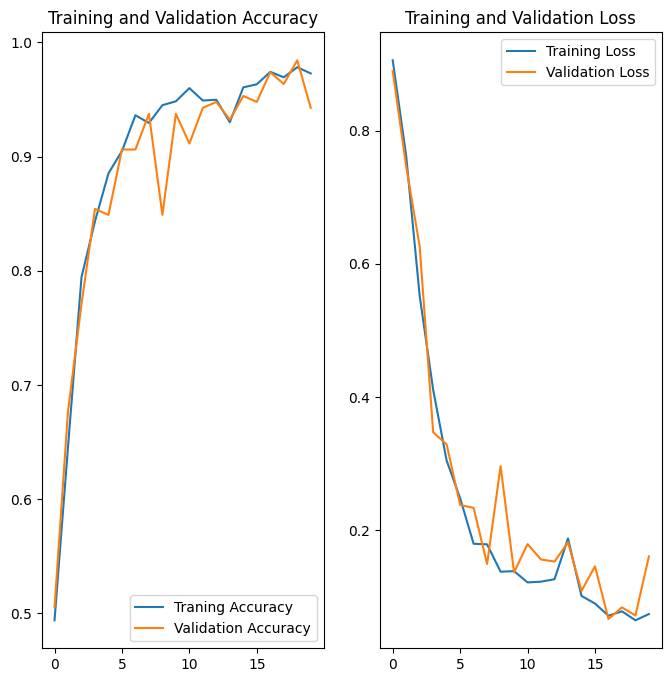

In [68]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Traning Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [74]:
class_names = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

first image to predict
actual label Potato___Late_blight
1/1 [==============================] - 1s 692ms/step
predicted label:  Potato___Late_blight


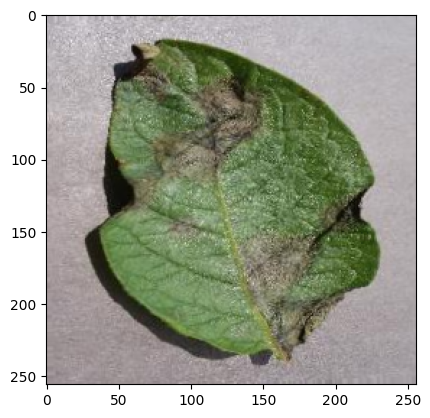

In [75]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    break

In [80]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array)

    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


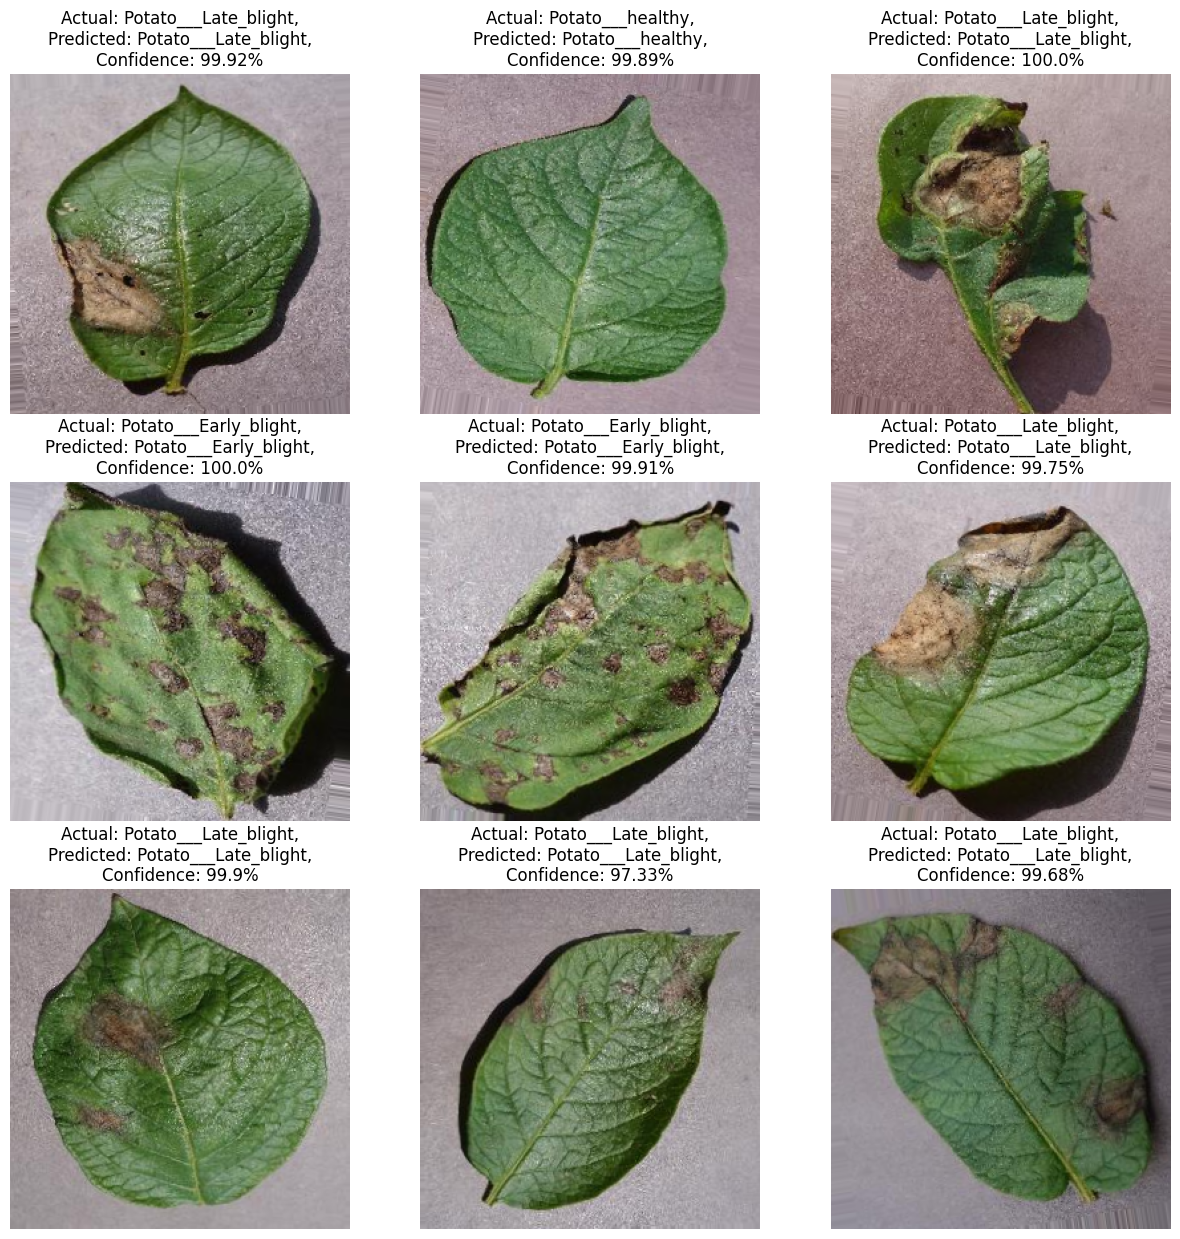

In [81]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        plt.title(
            f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}%"
        )
        plt.axis("off")
    break


In [82]:
model.save("../potatoes.h5")